## Step 1. Download the data and prepare it for analysis

<font color=blue>


## Optimization marketing expenses for Yandex.Afisha.
#### The main goals of data mining:

- To find out how people use the product.
- To find out when users start to buy.
- Calculate how much money each customer brings.
- When determine when marketing spends will pay off.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('../dataset/visits_log_us.csv', dtype = {'Source Id': 'category', 'Device': 'category'},
                     parse_dates = ['End Ts', 'Start Ts'])

In [3]:
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [4]:
# Let's make the names of columns in lowercase.
visits.columns = [i.lower() for i in visits.columns]

In [5]:
visits.head()

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
orders = pd.read_csv('../dataset/orders_log_us.csv', parse_dates = ['Buy Ts'])

In [7]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
# Let's make the names of columns in lowercase.
orders.columns = [i.lower() for i in orders.columns]

In [9]:
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
costs = pd.read_csv('../dataset/costs_us.csv', dtype = {'source_id': 'category'},
                     parse_dates = ['dt'])

In [11]:
costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


- In the **'visits'** table we have **5** columns and **359400** values in each column.

- We don't have missing values in columns. We changed type in columns 'end ts' and 'start ts' to DateTime. 
- We also changed type in columns 'source id' and 'device' to category. We made columns names in lowercase

- In the **'orders'** data frame we have **3** columns and **50415** values in each column. 
- We don't have missing values in columns. We changed type in columns 'buy ts' to DateTime and made columns names in lowercase. 

- In the **'costs'** table, we have **3** columns and **2542** values in each column. 
- We don't have missing values in columns. We changed type in columns 'dt' to DateTime. 

- Now data looks good and ready for further analysis.

## Step 2. Make reports and calculate metrics

In [13]:
# Let's add new columns of the day, week, month, and year when the sessions were started. 
visits['start_date'] = visits['start ts'].dt.date
visits['start_week'] = visits['start ts'].dt.week
visits['start_month'] = visits['start ts'].astype('datetime64[M]').dt.date
visits['start_year'] = visits['start ts'].dt.year
visits.head()

,device,end ts,source id,start ts,uid,start_date,start_week,start_month,start_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017


In [14]:
# Let's calculate the number of unique users per day, week, and month. 
dau = visits.groupby('start_date').agg({'uid': 'nunique'})
dau_total = dau.mean().astype('int')
wau = visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'})
wau_total = wau.mean().astype('int')
mau = visits.groupby(['start_month']).agg({'uid': 'nunique'})
mau_total = mau.mean().astype('int')

print(f'Average number of unique users every day: {dau_total[0]}')
print(f'Average number of unique users every week: {wau_total[0]}')
print(f'Average number of unique users every month: {mau_total[0]}')

Average number of unique users every day: 907
Average number of unique users every week: 5716
Average number of unique users every month: 23228


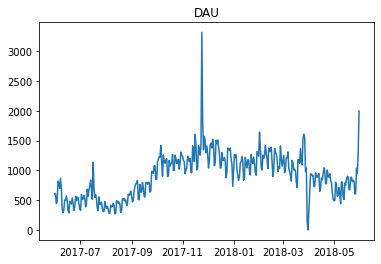

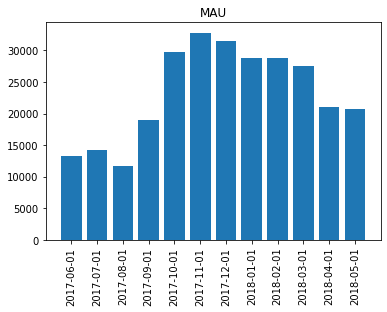

In [15]:
plt.plot(dau.index, dau['uid'])
plt.title('DAU')
plt.show()
plt.bar(range(len(mau)), mau['uid'])
plt.xticks(range(len(mau)), mau.index, rotation=90)
plt.title('MAU')
plt.show()

In [16]:
# Let's calculate sticky factor. 
sticky_factor_week = dau_total / wau_total * 100
sticky_factor_month = dau_total / mau_total * 100
print(f'Sticky factor per week: {sticky_factor_week[0]:.2f}')
print(f'Sticky factor per month: {sticky_factor_month[0]:.2f}')

Sticky factor per week: 15.87
Sticky factor per month: 3.90


#### How many people use it every day, week, and month?
- Average number of unique users every day: **907**
- Average number of unique users every week: **5716**
- Average number of unique users every month: **23228**
- On the DAU graph, we can see weekly seasonality. 
- On MAU graph we can see growths starts from October 2017.


In [17]:
# Let's calculate the number of sessions per day.
sessions_per_day = visits.groupby('start_date').agg({'uid': 'count'})
sessions_per_day_mean = sessions_per_day.mean()
print(f'Average number of sessions per day: {sessions_per_day_mean[0]:.2f}')

Average number of sessions per day: 987.36


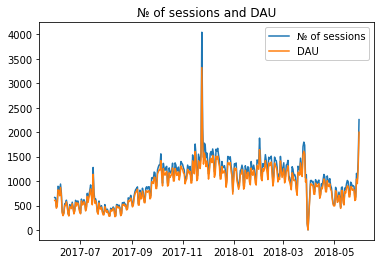

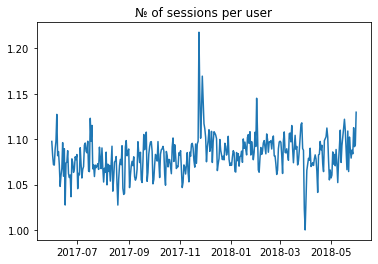

In [18]:
plt.plot(sessions_per_day.index, sessions_per_day['uid'], label = '№ of sessions')
plt.plot(dau.index, dau['uid'], label = 'DAU')
plt.legend(framealpha=1, frameon=True);
plt.title('№ of sessions and DAU')
plt.show()
# Let's calculate the average number of sessions per user.
plt.plot(sessions_per_day.index, sessions_per_day['uid'] / dau['uid'])
plt.title('№ of sessions per user')
plt.show()

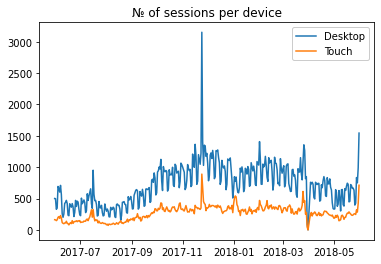

In [19]:
# Let's group by type of device.
sessions_per_day_platfom = visits.groupby(['start_date', 'device']).agg({'uid': 'count'}).reset_index()
# Let's divide into two tables and plot graph for each device.
desktop = sessions_per_day_platfom[sessions_per_day_platfom['device'] == 'desktop']
touch = sessions_per_day_platfom[sessions_per_day_platfom['device'] == 'touch']
plt.plot(desktop['start_date'], desktop['uid'], label = 'Desktop')
plt.plot(touch['start_date'], touch['uid'], label = 'Touch')
plt.legend(framealpha=1, frameon=True);
plt.title('№ of sessions per device')
plt.show()

#### How many sessions are there per day?
- Average number of sessions per day: **987.36** 
- From the graph '№ of sessions and DAU',  we can see that the number of sessions is similar to the number of unique users every day. From the graph '№ of sessions per user', we can see that the average number of sessions per user ~ **1.1**. 
- We also see that **Desktop** devices in much more popular than the Touch devices.
- At the end of **2017**, we can see growth in sessions it can be explained that people buy more tickets during the winter holidays and seasonal growth in the number of events. 

In [20]:
# Let's calculate length of each session in seconds.
visits['session_length'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits.head()

,device,end ts,source id,start ts,uid,start_date,start_week,start_month,start_year,session_length
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12-01,2017,0


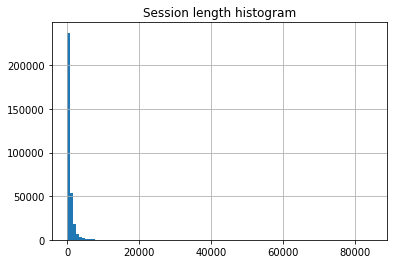

In [21]:
# Let's plot histogram to look at distribution. 
# We will exclude sessions of 0 lengths from our analysis.
visits[visits['session_length'] > 0]['session_length'].hist(bins = 100)
plt.title('Session length histogram')
plt.show()

We see skewed distribution let's use **median** instead of mean because it's more representative in our case. 

In [22]:
length_median = visits[visits['session_length'] > 0]['session_length'].median()
print(f'Average length of sessions in seconds: {length_median}')
# Let's divide data into devices and calculate the median for each device.
visits[visits['session_length'] > 0].groupby('device')['session_length'].median()

Average length of sessions in seconds: 360.0


device
desktop    420
touch      240
Name: session_length, dtype: int64

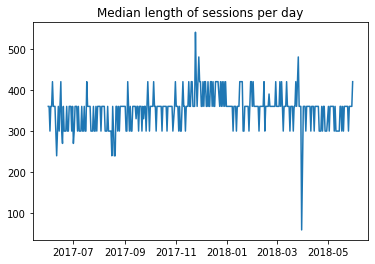

In [23]:
# Let's group by 'start_date', calculate the median and plot graph 
sessions_len = visits[visits['session_length'] > 0].groupby(['start_date']).agg({'session_length': 'median'}).reset_index()
plt.plot(sessions_len['start_date'], sessions_len['session_length'])
plt.title('Median length of sessions per day')
plt.show()

#### What is the length of each session?

- From the graph 'Session length histogram' we see skewed distribution with a heavy tail so it is better to use the median instead of the mean.
- We calculated that the average session lasts **6** minutes.  
- On Desktop device users spend 7 minutes and only 4 minutes on Touch device. 
- We see that the median session length is quite stable during the given period of time. 

In [24]:
# Let's create table with date of first activity for each user.
first_month_act = visits.groupby('uid')['start_month'].min()
first_month_act.name = 'first_month_act'

In [25]:
# We will add first activity date in 'visits' table.
visits = visits.merge(first_month_act.reset_index(), on ='uid')
visits.head()

,device,end ts,source id,start ts,uid,start_date,start_week,start_month,start_year,session_length,first_month_act
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12-01,2017,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02-01,2018,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,2017,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05-01,2018,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,2018-03-01,2018,1680,2018-03-01


In [26]:
# Let's add month lifetime of each session.
visits['life_time'] = ((visits['start_month'] - visits['first_month_act']) / np.timedelta64(1, 'M')).astype('int')
# Create cohorts by first month of activity. 
cohorts = visits.groupby(['first_month_act', 'life_time']).agg({'uid': 'nunique'}).reset_index()
# For each cohort let's extract the number of sessions with 0 month lifetime.
life_time0 = cohorts[cohorts['life_time'] == 0][['first_month_act', 'uid']]
life_time0.columns = ['first_month_act', 'n_lifeO']
# Let's calculate retention.
cohorts = cohorts.merge(life_time0, on = 'first_month_act')
cohorts['retention'] = cohorts['uid'] / cohorts['n_lifeO'] * 100
cohorts.head()

,first_month_act,life_time,uid,n_lifeO,retention
0,2017-06-01,0,13259,13259,100.000000
1,2017-06-01,2,713,13259,5.377479
2,2017-06-01,3,814,13259,6.139226
3,2017-06-01,4,909,13259,6.855721
4,2017-06-01,5,947,13259,7.142318


<AxesSubplot:title={'center':'Retention by cohorts'}, xlabel='life_time', ylabel='first_month_act'>

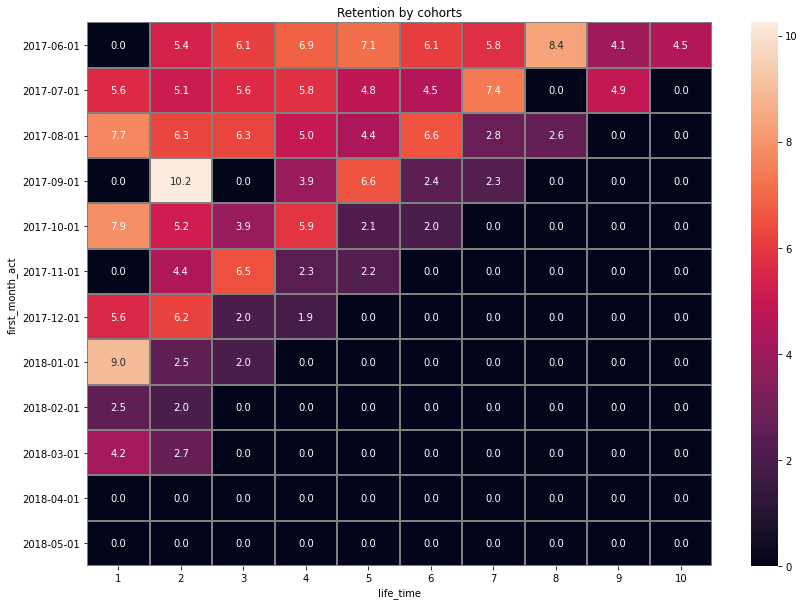

In [27]:
# For better visualization let's make a pivot table for retention and plot heatmap. 
cohorts_retention = cohorts.pivot_table(index = 'first_month_act', columns = 'life_time', values = 'retention').iloc[:, 1:]
cohorts_retention = cohorts_retention.fillna(0)
plt.figure(figsize = (14, 10))
plt.title('Retention by cohorts')
sns.heatmap(cohorts_retention, annot = True, fmt = '.1f', linewidths = 1, linecolor = 'gray')

#### How often do users come back?
- On the heatmap, we can see that retention is low. 
- Users come back not often. We can see some activity. 
- I assume that customers don't need to check and buy tickets for events very often. 
- We can't see any trend behavior in retention from month to month. 

In [28]:
# Let's find day of first order for each user.
date_first_order = orders.groupby('uid').agg({'buy ts': 'min'})
# Let's ad the date of the first activity and merge these tables. 
first_act_ts = visits.groupby('uid').agg({'start ts': 'min'})
date_first_order = date_first_order.merge(first_act_ts, on = 'uid')
date_first_order.columns = ['first_order_ts', 'first_act_ts']
# Let's calculate how many days it took to convert.
date_first_order['conv_lifetime'] = (date_first_order['first_order_ts'] - date_first_order['first_act_ts']).dt.days
# Let's add the firs activity month. 
date_first_order['first_act_month'] = date_first_order['first_act_ts'].astype('datetime64[M]')
date_first_order.head()

,first_order_ts,first_act_ts,conv_lifetime,first_act_month
uid,,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106,2017-09-01
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,2017-06-01
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0,2017-10-01
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0,2018-01-01
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,2017-11-01


In [29]:
# Let's split the lifetime into 7 categories. 
def lifetime(x):
    if x == 0:
        return '0d'
    elif 0 < x <= 7:
        return '7d'
    elif 7 < x <= 14:
        return '14d'
    elif 14 < x <= 30:
        return '30d'
    elif 30 < x <= 60:
        return '60d'
    elif 60 < x <= 90:
        return '90d'
    else:
        return '>90d'
    
date_first_order['lifetime_category'] = date_first_order['conv_lifetime'].apply(lifetime)
pivot_first_order = date_first_order.reset_index().pivot_table(index = 'first_act_month', columns = 'lifetime_category', 
                             values = 'uid', aggfunc = 'count')
pivot_first_order

lifetime_category,0d,14d,30d,60d,7d,90d,>90d
first_act_month,,,,,,,
2017-06-01,1804.0,50.0,97.0,91.0,178.0,87.0,616.0
2017-07-01,1526.0,50.0,53.0,91.0,177.0,105.0,456.0
2017-08-01,1097.0,32.0,64.0,85.0,97.0,80.0,266.0
2017-09-01,1966.0,83.0,144.0,147.0,256.0,130.0,332.0
2017-10-01,3302.0,111.0,183.0,226.0,373.0,125.0,358.0
2017-11-01,2866.0,163.0,190.0,207.0,415.0,123.0,298.0
2017-12-01,2992.0,106.0,129.0,172.0,388.0,115.0,172.0
2018-01-01,2326.0,81.0,130.0,146.0,287.0,60.0,89.0
2018-02-01,2482.0,81.0,110.0,83.0,327.0,62.0,41.0


In [30]:
# Let's filter out users, which made orders at registration day.
date_first_order_0d = date_first_order[date_first_order['lifetime_category'] == '0d']
# Let's calculate how many hours users spend to make first order.
date_first_order_0d['conv_hour'] =  ((date_first_order_0d['first_order_ts'] - date_first_order_0d['first_act_ts']) 
                                     / np.timedelta64(1, 'h')).astype('int')
date_first_order_0d

,first_order_ts,first_act_ts,conv_lifetime,first_act_month,lifetime_category,conv_hour
uid,,,,,,
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,2017-06-01,0d,0
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0,2017-10-01,0d,1
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0,2018-01-01,0d,19
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,2017-11-01,0d,0
3077748354309989,2018-03-03 12:33:00,2018-03-03 12:08:00,0,2018-03-01,0d,0
...,...,...,...,...,...,...
18438888612344691875,2017-08-24 23:42:00,2017-08-24 23:15:00,0,2017-08-01,0d,0
18439162270906870763,2017-08-10 21:40:00,2017-08-10 21:37:00,0,2017-08-01,0d,0
18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00,0,2018-02-01,0d,0


In [31]:
# Let's create cohorts pivot table by hour.
hour_p = date_first_order_0d.reset_index().pivot_table(index='first_act_month', columns = 'conv_hour', values = 'uid', aggfunc = 'nunique')
hour_p.head()

conv_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
first_act_month,,,,,,,,,,,,,,,,,,,,,
2017-06-01,1607.0,44.0,19.0,12.0,8.0,7.0,4.0,7.0,3.0,6.0,...,9.0,5.0,5.0,3.0,6.0,5.0,8.0,10.0,10.0,6.0
2017-07-01,1324.0,56.0,31.0,17.0,12.0,9.0,7.0,7.0,1.0,2.0,...,2.0,4.0,4.0,1.0,3.0,3.0,8.0,2.0,6.0,10.0
2017-08-01,971.0,34.0,19.0,13.0,8.0,8.0,3.0,1.0,1.0,4.0,...,1.0,1.0,1.0,6.0,2.0,4.0,5.0,4.0,3.0,3.0
2017-09-01,1708.0,70.0,36.0,16.0,15.0,12.0,6.0,5.0,4.0,6.0,...,6.0,7.0,10.0,7.0,5.0,5.0,7.0,8.0,10.0,6.0
2017-10-01,2879.0,115.0,43.0,33.0,21.0,17.0,13.0,14.0,12.0,8.0,...,9.0,7.0,14.0,13.0,8.0,11.0,16.0,11.0,10.0,13.0


In [32]:
# Let's calculate number of registered users by month.
n_of_users = date_first_order.reset_index().groupby('first_act_month').agg({'uid': 'nunique'})
n_of_users

,uid
first_act_month,
2017-06-01,2923
2017-07-01,2458
2017-08-01,1721
2017-09-01,3058
2017-10-01,4678
2017-11-01,4262
2017-12-01,4074
2018-01-01,3119
2018-02-01,3186


In [33]:
# Let's extract users, that made first order in an hour after registration. 
n_users_0h = hour_p.iloc[:,0]
# Let's merge this tables. 
final = n_of_users.merge(n_users_0h, left_index = True, right_index=True)
# Let's rename columns names.
final.columns = ['cohort_size', 'n_users_hour_converted']
# Let's calculate the percentage of users who made the first purchase in the first hour after registration.
final['percent'] = final['n_users_hour_converted'] / final['cohort_size'] * 100
print(final)
print(final['percent'].mean())

                 cohort_size  n_users_hour_converted    percent
first_act_month                                                
2017-06-01              2923                  1607.0  54.977763
2017-07-01              2458                  1324.0  53.864931
2017-08-01              1721                   971.0  56.420686
2017-09-01              3058                  1708.0  55.853499
2017-10-01              4678                  2879.0  61.543395
2017-11-01              4262                  2356.0  55.279212
2017-12-01              4074                  2543.0  62.420226
2018-01-01              3119                  1965.0  63.000962
2018-02-01              3186                  2126.0  66.729441
2018-03-01              2838                  2024.0  71.317829
2018-04-01              1890                  1320.0  69.841270
2018-05-01              2316                  1759.0  75.949914
62.266593853835865


#### When do people start buying?
- We find out, that **62%** of users, who made at list one order, made their first order during the first hour after the registration. 
- I assume, that it can be explained by the context of Yandex.Afisha. Most likely users already know which kind of event they want to visit. So right after registration, they make an order. 
- Also, the big amount of sessions and a relatively small number of orders can be explained, that users use the application only to find out the schedule of the invents and maybe to buy it sometime. 

In [34]:
# Let's look when and from what sources users came from. 
first_month_act = visits.groupby('uid').agg({'start_month': 'min', 'source id': 'last', 'device': 'last'})
first_month_act.columns = ['first_month_act', 'source_id', 'device']
first_month_act

,first_month_act,source_id,device
uid,,,
11863502262781,2018-03-01,3,touch
49537067089222,2018-02-01,2,touch
297729379853735,2017-06-01,3,desktop
313578113262317,2017-09-01,2,desktop
325320750514679,2017-09-01,5,desktop
...,...,...,...
18446403737806311543,2017-11-01,5,desktop
18446424184725333426,2017-12-01,4,touch
18446556406699109058,2018-01-01,3,touch


In [35]:
# Let's add sources into the 'orders' table.
orders_source = orders.merge(first_month_act.reset_index(), on = 'uid')
orders_source['buy_date'] = orders_source['buy ts'].dt.date
orders_source

,buy ts,revenue,uid,first_month_act,source_id,device,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,touch,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,desktop,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,desktop,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-01,4,desktop,2018-05-31


            n_orders  n_users  orders_per_user
buy_date                                      
2017-06-01        96       86         1.116279
2017-06-02       111      101         1.099010
2017-06-03        67       61         1.098361
2017-06-04        66       59         1.118644
2017-06-05       161      146         1.102740
2017-06-06       198      177         1.118644
2017-06-07       197      178         1.106742
2017-06-08       181      171         1.058480
2017-06-09       131      123         1.065041
2017-06-10        42       39         1.076923
1.0795790119141253


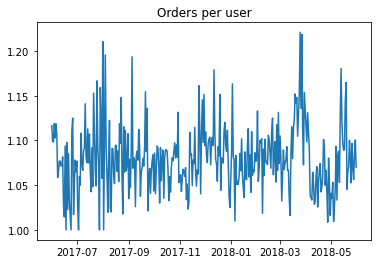

In [36]:
# We will calculate the number of orders and  number of users that made these orders each day.
orders_pivot = orders_source.pivot_table(index = 'buy_date', aggfunc = {'uid': ['count', 'nunique']})
orders_pivot.columns = ['n_orders', 'n_users']
# Let's calculate how many orders makes one user on average.
orders_pivot['orders_per_user'] = orders_pivot['n_orders'] / orders_pivot['n_users']
# Let's calculate the mean and plot graph excluding the last month of observation because this month is not representative. 
print(orders_pivot.head(10))
print(orders_pivot['orders_per_user'][:-1].mean())
plt.plot(orders_pivot.index[:-1], orders_pivot['orders_per_user'][:-1])
plt.title('Orders per user')
plt.show()

In [37]:
# Let's group by different sources. 
orders_pivot_source = orders_source.pivot_table(index = ['buy_date', 'source_id'], aggfunc = {'uid': ['count', 'nunique']})
orders_pivot_source.columns = ['n_orders', 'n_users']
# Let's calculate how many orders makes one user on average.
orders_pivot_source['orders_per_user'] = orders_pivot_source['n_orders'] / orders_pivot_source['n_users']
orders_pivot_source = orders_pivot_source.reset_index()
orders_pivot_source.groupby('source_id')['orders_per_user'].agg('mean')

source_id
1     1.143530
10    1.040825
2     1.127266
3     1.037848
4     1.041925
5     1.121525
7     1.000000
9     1.039841
Name: orders_per_user, dtype: float64

#### How many orders do they make during a given period of time?
- We can see that number of users, that make orders is changing. But one user on average still makes **1.1** orders per day. 
- From the graph, we can see that number of orders is quite stable from day to day.
- The number of orders per user didn't change from different sources. Users from source 6 didn't make any orders.

In [38]:
# Let's calculate the date of the first order for each user. 
first_buy_date = orders_source.groupby('uid').agg({'buy_date': 'min'})
first_buy_date = first_buy_date.reset_index()
first_buy_date.columns = ['uid', 'first_buy_date']
first_buy_date.head()

,uid,first_buy_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [39]:
# Let's add the date of the first order into the table 'orders_source'.
orders_source = orders_source.merge(first_buy_date, on = 'uid')
# Let's calculate the month of the first order.
orders_source['first_buy_month'] = orders_source['first_buy_date'].astype('datetime64[M]')
# Let's calculate the month of each order.
orders_source['buy_month'] = orders_source['buy_date'].astype('datetime64[M]')
orders_source.head()

,buy ts,revenue,uid,first_month_act,source_id,device,buy_date,first_buy_date,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01,2017-06-01,2017-06-01,2017-06-01


     buy_date  total_revenue  n_buyers  avg_check
0  2017-06-01         389.46        86   4.528605
1  2017-06-02         324.11       101   3.209010
2  2017-06-03         166.48        61   2.729180
3  2017-06-04         195.21        59   3.308644
4  2017-06-05         441.49       146   3.023904
5.33093075333997


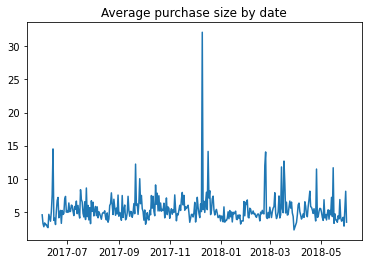

In [40]:
# Let's calculate the daily average perches size. 
avg_check = orders_source.groupby('buy_date').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
avg_check.columns = ['buy_date', 'total_revenue', 'n_buyers']
avg_check['avg_check'] = avg_check['total_revenue'] / avg_check['n_buyers']
print(avg_check.head())
print(avg_check['avg_check'].mean())
plt.plot(avg_check['buy_date'], avg_check['avg_check'])
plt.title('Average purchase size by date')
plt.show()

   first_month_act  total_revenue  n_buyers  avg_check
0       2017-06-01       40026.05      2923  13.693483
1       2017-07-01       17812.11      2458   7.246587
2       2017-08-01       13461.87      1721   7.822121
3       2017-09-01       33682.56      3058  11.014572
4       2017-10-01       27857.69      4678   5.955043
5       2017-11-01       24426.72      4262   5.731281
6       2017-12-01       31157.85      4074   7.647975
7       2018-01-01       14546.82      3119   4.663937
8       2018-02-01       15061.29      3186   4.727335
9       2018-03-01       13770.16      2838   4.852065
10      2018-04-01        9882.55      1890   5.228862
11      2018-05-01       10371.53      2316   4.478208
6.921789035103942


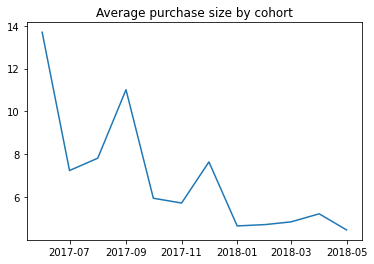

In [41]:
# Let's calculate average perches size for each cohort. 
avg_check = orders_source.groupby('first_month_act').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
avg_check.columns = ['first_month_act', 'total_revenue', 'n_buyers']
avg_check['avg_check'] = avg_check['total_revenue'] / avg_check['n_buyers']
print(avg_check)
print(avg_check['avg_check'].mean())
plt.plot(avg_check['first_month_act'], avg_check['avg_check'])
plt.title('Average purchase size by cohort')
plt.show()

  source_id  total_revenue  n_buyers  avg_check
2         2       63180.52      4239  14.904581
0         1       40619.71      3831  10.602900
5         5       42665.96      6753   6.318075
4         4       50550.26      9894   5.109183
3         3       44575.20      9158   4.867351
7         9        6547.26      1417   4.620508
1        10        3917.07      1230   3.184610
6         7           1.22         1   1.220000


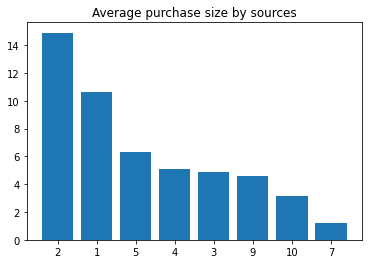

In [42]:
# Let's calculate the average purchase size for the whole period by different sources.
avg_check_source = orders_source.groupby('source_id').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
avg_check_source.columns = ['source_id', 'total_revenue', 'n_buyers']
avg_check_source['avg_check'] = avg_check_source['total_revenue'] / avg_check_source['n_buyers']
avg_check_source.sort_values('avg_check', ascending = False, inplace=True)
print(avg_check_source)
plt.bar(avg_check_source['source_id'], avg_check_source['avg_check'])
plt.title('Average purchase size by sources')
plt.show()

#### What is the average purchase size?
- Daily average purchase size is ~ **5.33**. From the graph, we can see that the average purchase size is quite stable with some picks. We see a huge pick at the end of the year, which can be explained by the winter holidays. 
- After 2017-09-01 cohort average purchases check started to **decrease**.
- The average purchase size by sources is varying. Source 2 has the biggest average purchase size ~ **14.9**.

In [43]:
# Let's build cohorts by the month of the first order.
cohort_sizes = orders_source.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [44]:
# We'll group the table of orders by the month of first order and month of order and sum up the revenue. 
cohorts = orders_source.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [45]:
# Let's add data on how many users made their first order in each month to the cohorts table.
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report.head()

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


We will set a margin rate **40%** which is standard for e-commerce.

In [46]:
# Let's calculate basis of gross profit.
margin_rate = .4
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report

,first_buy_month,n_buyers,buy_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,445.948,2
75,2018-04-01,2276,2018-04-01,10600.69,4240.276,0
76,2018-04-01,2276,2018-05-01,1209.92,483.968,1
77,2018-05-01,2988,2018-05-01,13925.76,5570.304,0


In [47]:
# calculate LTV
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean')

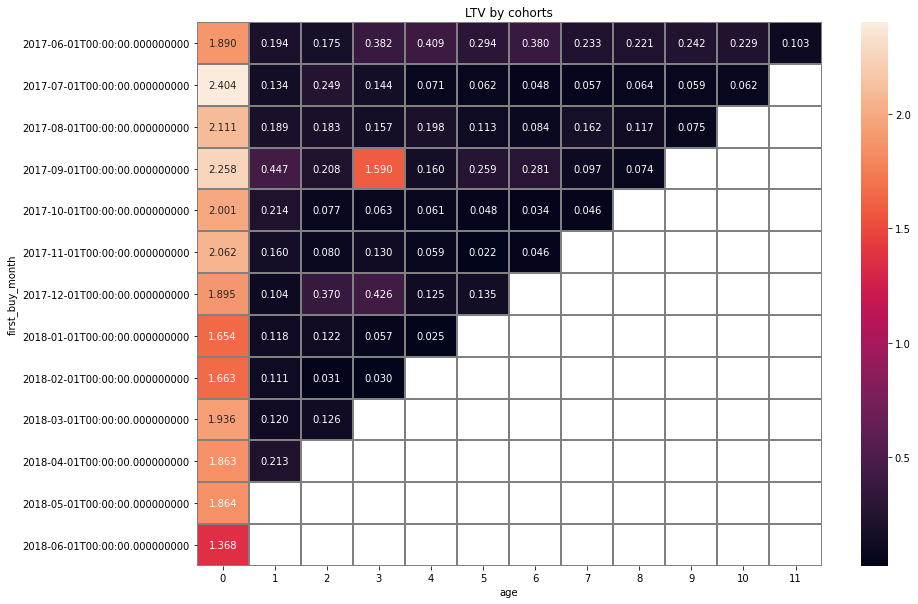

In [48]:
# For better visualization let's plot heatmap. 
plt.figure(figsize = (14, 10))
plt.title('LTV by cohorts')
sns.heatmap(output, annot = True, fmt = '.3f', linewidths = 1, linecolor = 'gray')
plt.show()

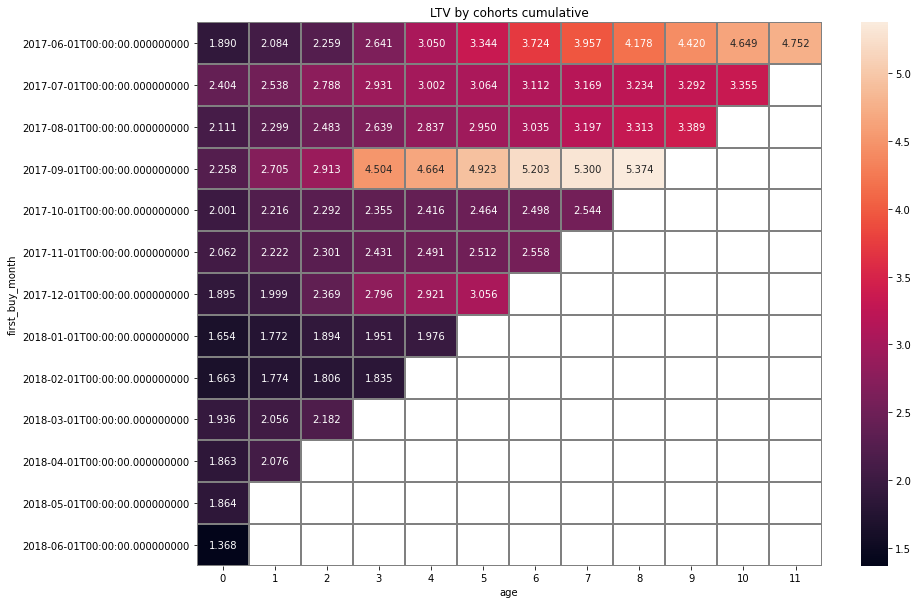

In [49]:
# Calculate cumulative LTV.
output2 = output.cumsum(axis=1)
# For better visualization let's plot heatmap. 
plt.figure(figsize = (14, 10))
plt.title('LTV by cohorts cumulative')
sns.heatmap(output2, annot = True, fmt = '.3f', linewidths = 1, linecolor = 'gray')
plt.show()

Compare LTV cohorts that "lives" the same periods number (e.g. 6 month)
As we can see on average ~53% of the profit from the user we get during 0 lifetimes on a given time that we have in the dataset. For example, for 6 months we get ~4% of the profit on average. 

In [50]:
result = pd.DataFrame(output.mean(axis=0) )
result.columns = ['average_by_lifetime']
result['percent'] = result['average_by_lifetime'] / result['average_by_lifetime'].sum() * 100 
result

,average_by_lifetime,percent
age,,
0,1.920673,52.984693
1,0.182219,5.026778
2,0.162199,4.474515
3,0.330889,9.128088
4,0.138457,3.819536
5,0.133397,3.679955
6,0.145511,4.014140
7,0.118963,3.281779
8,0.119066,3.284627


#### How much money do they bring?
To answer this question we calculated LTV. 
- From the first heatmap, we can see, that users bring most of the money during the first month after the first order. 
- From the second heatmap we can see that 2017-06-01 and 2017-09-01 cohorts bring more money than other cohorts during the same lifetime periods.

In [51]:
# Let's add month from date in the 'orders' table
costs['month'] = costs['dt'].astype('datetime64[M]')
print(costs.head())
overall = costs['costs'].sum()
print('\n\nWas spent in total:', overall)

  source_id         dt  costs      month
0         1 2017-06-01  75.20 2017-06-01
1         1 2017-06-02  62.25 2017-06-01
2         1 2017-06-03  36.53 2017-06-01
3         1 2017-06-04  55.00 2017-06-01
4         1 2017-06-05  57.08 2017-06-01


Was spent in total: 329131.62


          dt    cost
0 2017-06-01  735.26
1 2017-06-02  721.19
2 2017-06-03  450.85
3 2017-06-04  761.16
4 2017-06-05  821.44


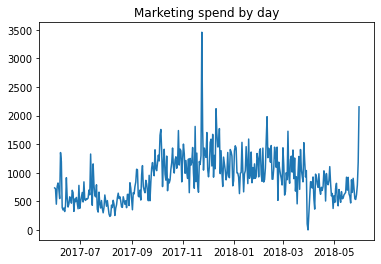

In [52]:
# Let's group by date. 
cost = costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
cost.columns = ['dt', 'cost']
print(cost.head())
# For better visualization let's plot graph.
plt.plot(cost['dt'], cost['cost'])
plt.title('Marketing spend by day')
plt.show()

        month      cost
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


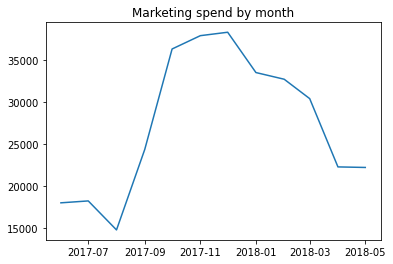

In [53]:
# Let's group by month. 
cost_m = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
cost_m.columns = ['month', 'cost']
print(cost_m)
# For better visualization let's plot graph.
plt.plot(cost_m['month'], cost_m['cost'])
plt.title('Marketing spend by month')
plt.show()

  source_id      costs
3         3  141321.63
4         4   61073.60
5         5   51757.10
2         2   42806.04
0         1   20833.27


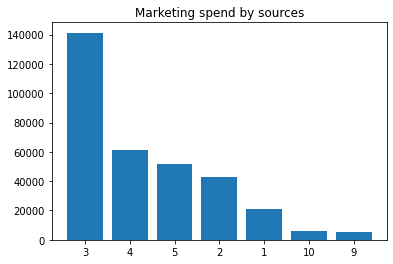

In [54]:
# Let's group by sources. 
source = costs.groupby('source_id').agg({'costs' : 'sum'}).reset_index()
source.sort_values(by = 'costs', ascending = False, inplace = True)
print(source.head())
# For better visualization let's plot graph.
plt.bar(source['source_id'], source['costs'])
plt.title('Marketing spend by sources')
plt.show()

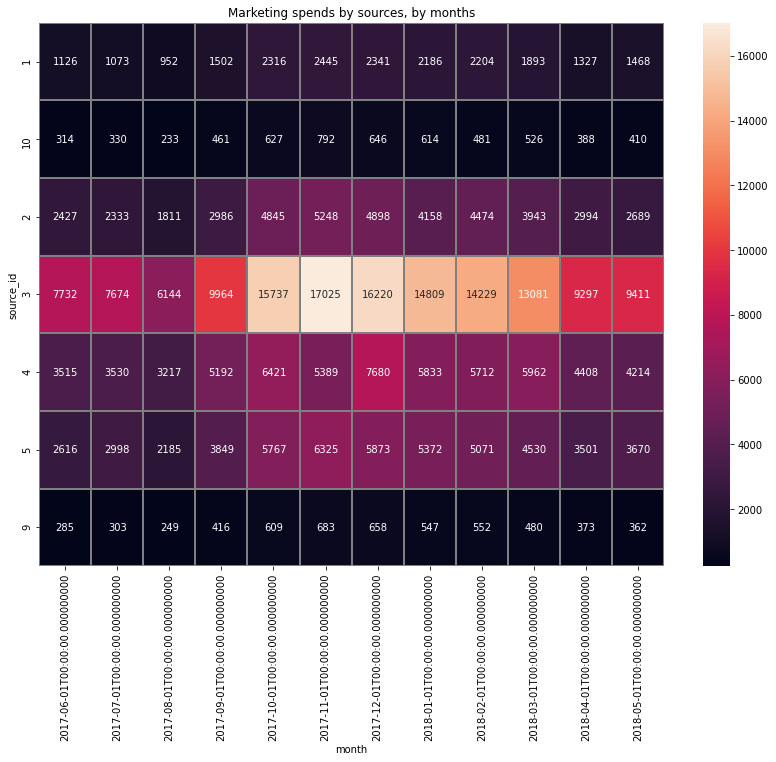

In [55]:
# Let's look at marketing spends by sources, by months. 
source2 = costs.pivot_table(index='source_id', columns='month', values='costs', aggfunc='sum')
plt.figure(figsize = (14, 10))
# For better visualization let's plot heatmap.
sns.heatmap(source2, annot = True, fmt = '.0f', linewidths = 1, linecolor = 'gray')
plt.title('Marketing spends by sources, by months')
plt.show()

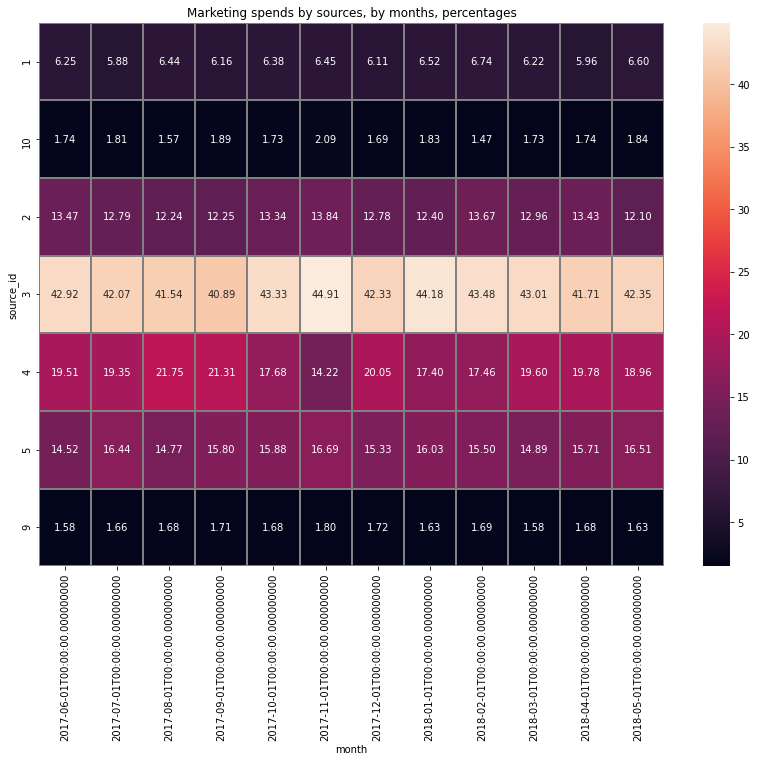

In [56]:
# Let's calculate percentage distribution by sources by month.
costs_percent = costs.merge(cost_m, on='month')
costs_percent['percentage'] = costs_percent['costs'] / costs_percent['cost']
costs_percent_pivot = costs_percent.pivot_table(index='source_id', columns='month', 
                                                values='percentage', aggfunc='sum') * 100
# For better visualization let's plot heatmap.
plt.figure(figsize = (14, 10))
sns.heatmap(costs_percent_pivot, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'gray')
plt.title('Marketing spends by sources, by months, percentages')
plt.show()

#### How much money was spent?

- Total marketing expenses were **329131.62**
- From the graph we can see that from **August to December** marketing spends were growing.
- Most of the money was invested in source 3, least of all in source 9.
- The proportions of invested money per month didn't change for sources all time along 
- ~42% of all marketing investments go into **source 3**

In [57]:
# Let's calculate how many users made purchases from different sources.
souce_users = orders_source.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
souce_users.columns = ['source_id', 'n_users']
souce_users

,source_id,n_users
0,1,3831
1,10,1230
2,2,4239
3,3,9158
4,4,9894
5,5,6753
6,7,1
7,9,1417


  source_id      costs  n_users        cac
0         3  141321.63     9158  15.431495
1         4   61073.60     9894   6.172792
2         5   51757.10     6753   7.664312
3         2   42806.04     4239  10.098146
4         1   20833.27     3831   5.438076


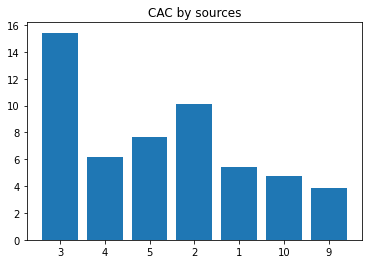

In [58]:
# Let's add a number of users to calculate CAC by sources. 
source = source.merge(souce_users, on = 'source_id')
source['cac'] = source['costs'] / source['n_users']
print(source.head())
# For better visualization let's plot graph.
plt.bar(source['source_id'], source['cac'])
plt.title('CAC by sources')
plt.show()

        month      cost first_buy_month   uid        cac
0  2017-06-01  18015.00      2017-06-01  2023   8.905091
1  2017-07-01  18240.59      2017-07-01  1923   9.485486
2  2017-08-01  14790.54      2017-08-01  1370  10.796015
3  2017-09-01  24368.91      2017-09-01  2581   9.441654
4  2017-10-01  36322.88      2017-10-01  4340   8.369327
5  2017-11-01  37907.88      2017-11-01  4081   9.288870
6  2017-12-01  38315.35      2017-12-01  4383   8.741809
7  2018-01-01  33518.52      2018-01-01  3373   9.937302
8  2018-02-01  32723.03      2018-02-01  3651   8.962758
9  2018-03-01  30415.27      2018-03-01  3533   8.608907
10 2018-04-01  22289.38      2018-04-01  2276   9.793225
11 2018-05-01  22224.27      2018-05-01  2988   7.437841


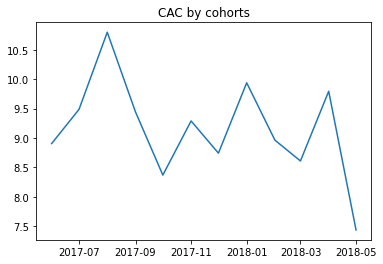

In [59]:
# Let's calculate CAC by cohorts.
cohort_size = orders_source.groupby('first_buy_month')['uid'].agg('nunique').reset_index()
cac_cohort = cost_m.merge(cohort_size, left_on='month', right_on='first_buy_month')
cac_cohort['cac'] = cac_cohort['cost'] / cac_cohort['uid']
print(cac_cohort)
# For better visualization let's plot graph.
plt.plot(cac_cohort['month'], cac_cohort['cac'])
plt.title('CAC by cohorts')
plt.show()

#### How much did customer acquisition from each of the sources cost?

- The most expensive customer acquisition was for source 3, CAC = 15.431495. The cheapest customer acquisition was for source 9.
- The most expensive customer acquisition was for August cohort, CAC = 10.796015.

In [60]:
# Let's calculate CAC by cohorts to calculate ROMI.
report_cac = pd.merge(report, cost_m, left_on='first_buy_month', right_on='month')
report_cac
report_cac['cac'] = report_cac['cost'] / report_cac['n_buyers']
report_cac.head() 

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv,month,cost,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,2017-06-01,18015.0,8.905091


In [61]:
# Let's calculate ROMI.
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
output = report_cac.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.21,0.23,0.25,0.3,0.34,0.38,0.42,0.44,0.47,0.5,0.52,0.53
2017-07-01,0.25,0.27,0.29,0.31,0.32,0.32,0.33,0.33,0.34,0.35,0.35,
2017-08-01,0.20,0.21,0.23,0.24,0.26,0.27,0.28,0.3,0.31,0.31,,
2017-09-01,0.24,0.29,0.31,0.48,0.49,0.52,0.55,0.56,0.57,,,
2017-10-01,0.24,0.26,0.27,0.28,0.29,0.29,0.3,0.3,,,,
2017-11-01,0.22,0.24,0.25,0.26,0.27,0.27,0.28,,,,,
2017-12-01,0.22,0.23,0.27,0.32,0.33,0.35,,,,,,
2018-01-01,0.17,0.18,0.19,0.2,0.2,,,,,,,
2018-02-01,0.19,0.2,0.2,0.2,,,,,,,,


In [62]:
# Let's find out how quickly cohorts pay off on average. 
output.cumsum(axis=1).mean(axis=0) 

age
0     0.216326
1     0.232794
2     0.252428
3     0.287896
4     0.313179
5     0.343950
6     0.358728
7     0.387980
8     0.421548
9     0.385795
10    0.437863
11    0.533593
dtype: float64

In [63]:
# Let's calculate the revenue for each source.
source_id = orders_source.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
source_id.columns = ['source_id', 'revenue']
source_id.head()

,source_id,revenue
0,1,40619.71
1,10,3917.07
2,2,63180.52
3,3,44575.20
4,4,50550.26


In [64]:
# Let's add revenue to table 'source'.
romi_sources = source.merge(source_id, on = 'source_id')
# Let's calculate LTV for different sources, using a margin 40%
romi_sources['ltv'] = (romi_sources['revenue'] * 0.4) / romi_sources['n_users']
romi_sources['romi'] = romi_sources['ltv'] / romi_sources['cac']
romi_sources

,source_id,costs,n_users,cac,revenue,ltv,romi
0,3,141321.63,9158,15.431495,44575.20,1.946940,0.126167
1,4,61073.60,9894,6.172792,50550.26,2.043673,0.331078
2,5,51757.10,6753,7.664312,42665.96,2.527230,0.329740
3,2,42806.04,4239,10.098146,63180.52,5.961833,0.590389
4,1,20833.27,3831,5.438076,40619.71,4.241160,0.779901
5,10,5822.49,1230,4.733732,3917.07,1.273844,0.269099
6,9,5517.49,1417,3.893783,6547.26,1.848203,0.474655


#### How worthwhile where the investments?

To answer this question we calculated ROMI by cohorts and by sources. 
- None of the cohorts paid off the marketing investment.
- The fastest paid off source 1, the latest paid off - source 3.
- On average, cohorts pay off 50% of investment after 12 months. 

## General conclusion
- In September-October, marketing spends were increased. The number of new users and sessions also were increased, but it didn't make an impact on a qualitative metric like average purchase size, the number of orders per user, retention. 

- Retention and Sticky factor are small, so we would recommend applying some methods to make users come back. 

- We figure out that marketing investment shares into sources stay stable during whole period, although total spends are increasing.  Most of the money goes into source 3. We. would recommend changing the proportion split between different sources to improve not only quantitative but also qualitative metrics. 

- It takes a lot of time to return investments if we have 0.4 margin, so we need to increase retention to do it faster. On average, cohorts pay off 50% of investment after 12 months.